<a href="https://colab.research.google.com/github/ctshiz/WORKSPACE_STOCK_MARKET_PREDICTION/blob/main/Stock_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: Determine the installed version of module pandas_datareader
!pip show pandas_datareader
#Step 2: if the version is lower than 0.10.0 then upgrade the version.
!pip install --upgrade pandas_datareader
#Step 3: Don't forget to restart the runtime to load the new libraries.
#Press Runtime->Restart runtime

Name: pandas-datareader
Version: 0.9.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: pandas, requests, lxml
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 32.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
#Step 4: Now try running the step 1 again to determine if the newest version is installed.
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: lxml, requests, pandas
Required-by: 


In [3]:
#step 5: importing packages
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
import seaborn
from datetime import datetime
import pandas_datareader.data as web

In [8]:
#Step-2: MACD Calculation
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df1 = pd.concat(frames, join = 'inner', axis = 1)
    return df1
    
#step 7: RSI calculation
def get_rsi(close, lookback):
  ret = close.diff()
  up = []
  down = []
  for i in range(len(ret)):
    if ret[i] < 0:
      up.append(0)
      down.append(ret[i])
    else:
      up.append(ret[i])
      down.append(0)
  up_series = pd.Series(up)
  down_series = pd.Series(down).abs()
  up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
  down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
  rs = up_ewm / down_ewm
  rsi = 100 - (100 /(1 + rs))
  rsi_df = pd.DataFrame(rsi).rename(columns={0:'RSI'}).set_index(close.index)
  rsi_df = rsi_df.dropna()
  return rsi_df[3:]

In [5]:
#Step-6: Extracting Data from Yahoo Finance
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime(2020, 1, 1) # the format is YYYY-MM-DD
end_date= datetime(2022, 12, 2)
# We will use data from Google and Microsoft in our analysis
banco_brasil= web.DataReader("BBAS3.SA", 'yahoo', start_date, end_date)
banco_brasil = banco_brasil.reset_index()

In [7]:
banco_brasil['rsi_14'] = get_rsi(banco_brasil['Close'], 14)
banco_brasil = banco_brasil.dropna()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close,rsi_14
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886517,0.000000
5,2020-01-09,52.330002,50.730000,52.200001,51.060001,24743000.0,42.993961,0.000000
6,2020-01-10,51.439999,49.560001,51.160000,49.860001,15348200.0,41.983521,0.000000
7,2020-01-13,50.500000,49.610001,49.980000,50.419998,14181900.0,42.455059,14.668015
8,2020-01-14,50.490002,49.750000,50.279999,50.150002,8765000.0,42.227718,13.629954
...,...,...,...,...,...,...,...,...
721,2022-11-28,35.200001,34.099998,34.389999,34.830002,8237300.0,34.830002,41.353815
722,2022-11-29,35.730000,34.590000,35.000000,35.250000,9135200.0,35.250000,43.582274
723,2022-11-30,35.810001,34.700001,35.419998,35.279999,12799000.0,35.279999,43.746694
724,2022-12-01,35.560001,34.720001,35.119999,35.240002,9118400.0,35.240002,43.564396


In [9]:
##Step-2: MACD Calculation
bbas3_macd = get_macd(banco_brasil['Close'], 26, 12, 9)
bbas3_macd

,macd,signal,hist
4,0.000000,0.000000,0.000000
5,-0.084558,-0.016912,-0.067647
6,-0.245570,-0.062643,-0.182927
7,-0.324249,-0.114965,-0.209284
8,-0.403735,-0.172719,-0.231016
...,...,...,...
721,-1.310613,-1.244204,-0.066408
722,-1.216423,-1.238648,0.022225
723,-1.126372,-1.216193,0.089821
724,-1.046174,-1.182189,0.136015


In [11]:
df3 = pd.merge(banco_brasil,bbas3_macd, left_index=True, right_index=True)
df3

,Date,High,Low,Open,Close,Volume,Adj Close,rsi_14,macd,signal,hist
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,43.886517,0.000000,0.000000,0.000000,0.000000
5,2020-01-09,52.330002,50.730000,52.200001,51.060001,24743000.0,42.993961,0.000000,-0.084558,-0.016912,-0.067647
6,2020-01-10,51.439999,49.560001,51.160000,49.860001,15348200.0,41.983521,0.000000,-0.245570,-0.062643,-0.182927
7,2020-01-13,50.500000,49.610001,49.980000,50.419998,14181900.0,42.455059,14.668015,-0.324249,-0.114965,-0.209284
8,2020-01-14,50.490002,49.750000,50.279999,50.150002,8765000.0,42.227718,13.629954,-0.403735,-0.172719,-0.231016
...,...,...,...,...,...,...,...,...,...,...,...
721,2022-11-28,35.200001,34.099998,34.389999,34.830002,8237300.0,34.830002,41.353815,-1.310613,-1.244204,-0.066408
722,2022-11-29,35.730000,34.590000,35.000000,35.250000,9135200.0,35.250000,43.582274,-1.216423,-1.238648,0.022225
723,2022-11-30,35.810001,34.700001,35.419998,35.279999,12799000.0,35.279999,43.746694,-1.126372,-1.216193,0.089821
724,2022-12-01,35.560001,34.720001,35.119999,35.240002,9118400.0,35.240002,43.564396,-1.046174,-1.182189,0.136015


In [17]:
df3['Year'] = df3.Date.dt.year

In [19]:
df3['Month'] = df3.Date.dt.month

In [61]:
ipca = pd.read_csv("/content/IPCA.csv", sep=";")
ipca['Date'] = pd.to_datetime(ipca.Data)

In [62]:
ipca['Year'] = ipca.Date.dt.year
ipca['Month'] = ipca.Date.dt.month

In [63]:
unrate = pd.read_csv("/content/taxa de desemprego.csv", sep=";")
unrate['Date'] = pd.to_datetime(unrate.Lançamento)
unrate['Year'] = unrate.Date.dt.year
unrate['Month'] = unrate.Date.dt.month

In [64]:
#merge all
ipca = ipca.drop(columns=['Date'])
unrate = unrate.drop(columns=['Date'])
df4 = df3.merge(ipca, on =['Year', 'Month'], how='inner')
df5 = df4.merge(unrate,on =['Year', 'Month'], how='inner')

In [65]:
df5 = df5.drop(columns=['Lançamento', 'Data', 'Hora', 'Projeção', 'Anterior', 'Unnamed: 5'])

In [66]:
df5 = df5.drop(columns=['High', 'Low', 'Volume', 'Adj Close'])

In [67]:
df5 = df5.drop(columns=['Year', 'Month', 'signal', 'hist'])

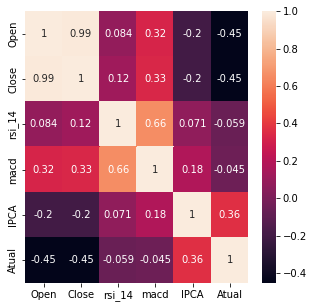

In [72]:
plt.figure(figsize=(5, 5))
seaborn.heatmap(df5.drop(columns=['Date']).corr(),annot=True)
